라이브러리 불러오기

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")


파일 불러오기

In [2]:
smart_farm = pd.read_csv("smart_farm.csv")
columns = pd.read_csv("(스마트팜)테이블 정의서.csv")

In [3]:
smart_farm.head(3)

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


컬럼명 재정의

In [38]:
smart_farm.columns = list(columns["정의"])
smart_farm.head()

,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


## 1. Datetime 생성
- 각 컬럼마다 나뉘어져 있는 년/월/일/시/분 을 합쳐서 하나의 객체로 관리
- datetime(년도, 월, 일, 시, 분 등등) 요소 입력
- 참고링크1 : https://www.daleseo.com/python-datetime/
- datetime 객체 참고링크2 : https://kkumalog.tistory.com/18
- strftime 참고링크3 : https://ponyozzang.tistory.com/626
- strptime 참고링크4 : https://jsikim1.tistory.com/217

In [ ]:
from datetime import datetime

1) 년/월/일 에 대한 정보를 입력받는 datetime

In [32]:
date = datetime(2020,9,2,11,35,16)
print(date)

2020-09-02 11:35:16


2) datetime 객체에서 다양한 시간 정보 추출

In [33]:
weekday_lst = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]

print("연도 정보 출력 :",datetime(2022,5,29).year)
print("월 정보 출력 :",datetime(2022,5,29).month)
print("일 정보 출력 :",datetime(2022,5,29).day)
print("요일 정보 출력 :",datetime(2022,5,29).weekday())
print(weekday_lst[6])

연도 정보 출력 : 2022
월 정보 출력 : 5
일 정보 출력 : 29
요일 정보 출력 : 6
일요일


3) datetime <-> 문자열 사이의 변환
- datetime to str : strftime
- str to datetime : strptime

In [34]:
print(date.strftime("%Y-%m-%d"))
# 2020-09-02

print(date.strftime('%Y-%m-%d %H:%M:%S'))
# 2020-09-02 11:35:16

print(date.strftime('%y%m%d'))
# 200902

print(date.strftime('%Y/%m/%d'))
# 2020/09/02

print(date.strftime('%A, %B %d, %Y'))
# Wednesday, September 02, 2020

print(date.strftime('%a, %b %d, %Y'))
# Wed, Sep 02, 2020

print('날짜 번호（1년중 며칠째인지 / 1월1일 은 001）:', date.strftime('%j'))
print('주 번호（일요일 기준 / 1월 첫번째 주 00）:', date.strftime('%U'))
print('주 번호（월요일 기준 / 1월 첫번째 주 00）:', date.strftime('%W'))

2020-09-02
2020-09-02 11:35:16
200902
2020/09/02
Wednesday, September 02, 2020
Wed, Sep 02, 2020
날짜 번호（1년중 며칠째인지 / 1월1일 은 001）: 246
주 번호（일요일 기준 / 1월 첫번째 주 00）: 35
주 번호（월요일 기준 / 1월 첫번째 주 00）: 35


In [37]:
date_string = "2020년 9월 2일 11시 35분 16초"
date_format = "%Y년 %m월 %d일 %H시 %M분 %S초"

date_result = datetime.strptime(date_string, date_format)
print(date_result)

2020-09-02 11:35:16


4) 실제 데이터로의 적용
- datetime 객체를 생성하기 위해 행 별로 년/월/일/시/분 데이터 수집

In [40]:
smart_farm.head(3)

,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


In [42]:
time_lst = []
ymd_lst = []

for idx, row in smart_farm.iterrows():
    
    date = datetime(int(row["년도"]), int(row["월"]), int(row["일"]), int(row["시"]), int(row["분"]))
    time_lst.append(date)
    
    ymd = datetime(int(row["년도"]), int(row["월"]), int(row["일"]))
    ymd_lst.append(ymd)

In [46]:
time_lst[:10]

[datetime.datetime(2021, 11, 26, 0, 0),
 datetime.datetime(2021, 11, 26, 0, 1),
 datetime.datetime(2021, 11, 26, 0, 2),
 datetime.datetime(2021, 11, 26, 0, 3),
 datetime.datetime(2021, 11, 26, 0, 4),
 datetime.datetime(2021, 11, 26, 0, 5),
 datetime.datetime(2021, 11, 26, 0, 6),
 datetime.datetime(2021, 11, 26, 0, 7),
 datetime.datetime(2021, 11, 26, 0, 8),
 datetime.datetime(2021, 11, 26, 0, 9)]

In [48]:
smart_farm["시간"] = time_lst
smart_farm["년월일"] = ymd_lst

5) date_range를 통한 날짜 구간 생성
- datetime 날짜구간 행 출력 : https://www.delftstack.com/ko/howto/python-pandas/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [74]:
date_range = pd.date_range(start="2021-12-26",end="2022-01-01")

In [81]:
smart_farm_range = smart_farm[smart_farm["년월일"].isin(date_range)].reset_index(drop=True)
smart_farm_range.head(3)

# 2021년 12월 26일부터 2022년 1월 1일 데이터만 추출

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-12-26 00:00:00,2021-12-26,2021,12,26,0,0,-3.2,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2021-12-26 00:01:00,2021-12-26,2021,12,26,0,1,-3.4,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2021-12-26 00:02:00,2021-12-26,2021,12,26,0,2,-3.3,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


In [75]:
date_range

DatetimeIndex(['2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-01'],
              dtype='datetime64[ns]', freq='D')

In [49]:
smart_farm[["시간","년월일","년도",'월', '일', '시', '분']]

,시간,년월일,년도,월,일,시,분
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4
...,...,...,...,...,...,...,...
132475,2022-02-28 23:55:00,2022-02-28,2022,2,28,23,55
132476,2022-02-28 23:56:00,2022-02-28,2022,2,28,23,56
132477,2022-02-28 23:57:00,2022-02-28,2022,2,28,23,57
132478,2022-02-28 23:58:00,2022-02-28,2022,2,28,23,58


In [71]:
smart_farm = smart_farm[["시간","년월일","년도",'월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)',
       '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)',
       '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)',
       '난방온도(설정온도)', '열공급량(kWh)']]

# 데이터프레임 컬럼 순서 변경

- 시간이 중복값이 없다면 시간 컬럼을 PK로 활용가능
- PK란? Primary Key의 약자로 행 간의 구분을 가능하게 하는 행별 고유 특성

### etc... duplicated()를 이용한 중복체크
- 데이터 행이 중복되는 경우가 존재
- 중복되는 데이터 행을 조회하거나 삭제하기 위한 방법 duplicated()
- 참고링크 : https://mizykk.tistory.com/93

In [54]:
smart_farm[smart_farm["시간"].duplicated()]
# '시간' 컬럼에 대해서 중복이 있는 경우 모두 True로 반환
# Boolean Indexing을 통해 중복확인

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)


In [60]:
df = pd.DataFrame()
df["년도"] = ["2020","2021","2022","2022"]
df["학점"] = [4.3,4.2,4.3,4.3]

df

,년도,학점
0,2020,4.3
1,2021,4.2
2,2022,4.3
3,2022,4.3


col 입력없이 전체 컬럼에 대해서 확인

In [64]:
# 중복인 요소 중, 첫 번째만 남기기
df.drop_duplicates(keep = 'first')

# 중복인 요소 중, 마지막만 남기기
df.drop_duplicates(keep = 'last')

# 중복인 요소 중, 모두 제거
df.drop_duplicates(keep = False)

,년도,학점
0,2020,4.3
1,2021,4.2


In [63]:
# 중복인 요소 중, 첫 번째만 남기기
df.drop_duplicates(['학점'], keep = 'first')

# 중복인 요소 중, 마지막만 남기기
df.drop_duplicates(['학점'], keep = 'last')

# 중복인 요소 중, 모두 제거
df.drop_duplicates(['학점'], keep = False)

,년도,학점
1,2021,4.2


## 2. 결측치 및 분포 확인
- 결측치 확인 및 분포 확인을 위한 다양한 plot
- 결측치 채우기

In [66]:
smart_farm.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


isnull
- 결측치가 존재하는 요소 모두 True로 변환
- True는 숫자로 변환 시, 1로 취급
- 전체 요소에 대한 합을 통해 결측치 개수 확인
- isnull()의 반대 notnull()

In [69]:
smart_farm.isnull().head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
smart_farm.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도              512
내부 습도              512
차광스크린(수평)          512
차열스크린(수평)          512
에너지스크린(수평)         512
에너지스크린(수직)         512
배기팬                512
천창                 512
유동팬                512
팬코일 B동             512
환기온도(천창 제어온도)      501
난방온도(설정온도)         500
열공급량(kWh)        21075
dtype: int64

### 1) y값 확인
- 예측데이터와 학습데이터 분리
- 학습데이터 : 모델 학습을 위한 데이타
- 검증데이터 : 학습시킨 모델을 통해 예측해야하는 기간의 데이터
- 검증기간 : 2021.12.26~2022.01.01(1주)
- 검증기간 : 2022.01.23~2022.01.29(1주)

In [82]:
smart_farm_df = smart_farm.set_index("시간")
# '시간' 컬럼을 데이터프레임의 index로 설정

In [93]:
smart_farm_df = smart_farm_df[smart_farm_df["열공급량(kWh)"].notnull()]
# notnull을 통해 결측이 없는 데이터만 추출

In [94]:
smart_farm_df["열공급량(kWh)"]
# '시간' index, '열공급량'을 데이터

시간
2021-11-26 00:00:00    0.9
2021-11-26 00:01:00    0.9
2021-11-26 00:02:00    0.9
2021-11-26 00:03:00    0.8
2021-11-26 00:04:00    1.0
                      ... 
2022-02-28 23:55:00    0.9
2022-02-28 23:56:00    0.8
2022-02-28 23:57:00    0.8
2022-02-28 23:58:00    0.8
2022-02-28 23:59:00    0.8
Name: 열공급량(kWh), Length: 111405, dtype: float64

시간별 열공급량 패턴 확인
- 전체 기간
- 월 단위
- 일 단위

Text(0.5, 1.0, '전체 기간 열공급량')

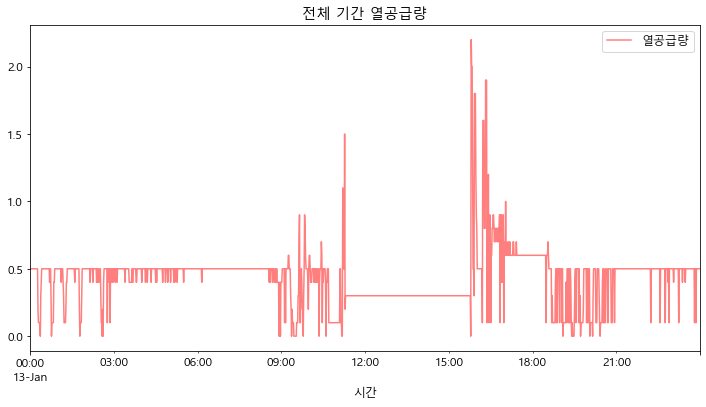

In [140]:
# 그래프 개수 및 사이즈 설정
fig,ax = plt.subplots(1,1,figsize=(12,6))

# 그래프 종류 및 데이터
plot_df["열공급량(kWh)"].plot(ax=ax,label="열공급량",color="Red",alpha=0.5)

# 그래프 범례 설정
plt.legend()
plt.title("전체 기간 열공급량")

Text(0.5, 1.0, '2월의 열공급량')

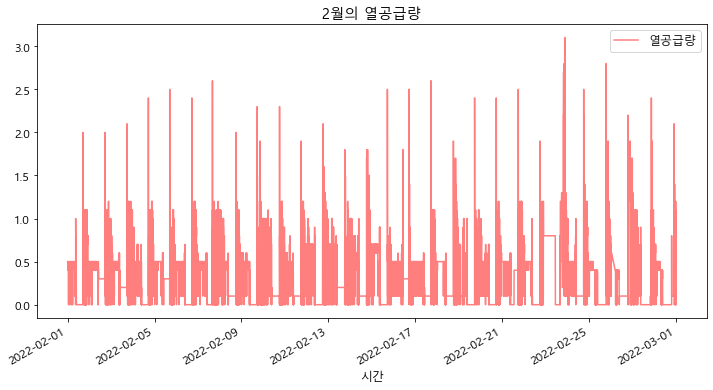

In [141]:
# 시각화 할 데이터
plot_df = smart_farm_df[smart_farm_df["월"] == 2]

# 그래프 개수 및 사이즈 설정
fig,ax = plt.subplots(1,1,figsize=(12,6))

# 그래프 종류 및 데이터
plot_df["열공급량(kWh)"].plot(ax=ax,label="열공급량",color="Red",alpha=0.5)

# 그래프 범례 설정
plt.legend()
plt.title("2월의 열공급량")

Text(0.5, 1.0, '2022년 2월 17일의 열공급량')

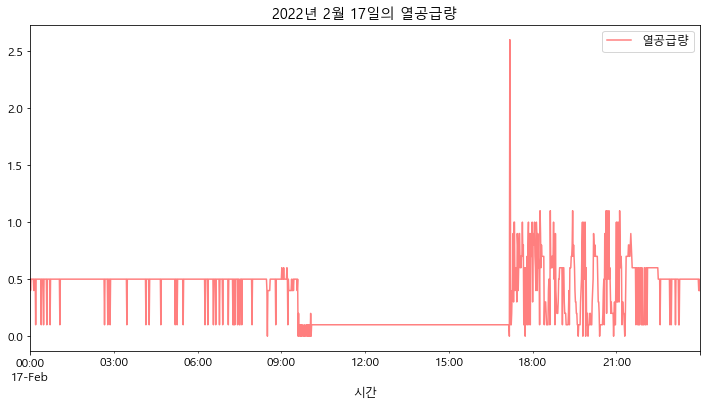

In [142]:
# 시각화 할 데이터
plot_df = smart_farm_df[smart_farm_df["년월일"] == "2022-02-17"]

# 그래프 개수 및 사이즈 설정
fig,ax = plt.subplots(1,1,figsize=(12,6))

# 그래프 종류 및 데이터
plot_df["열공급량(kWh)"].plot(ax=ax,label="열공급량",color="Red",alpha=0.5)

# 그래프 범례 설정
plt.legend()
plt.title("2022년 2월 17일의 열공급량")

Text(0.5, 1.0, '열공급량 9시, 10시 그래프')

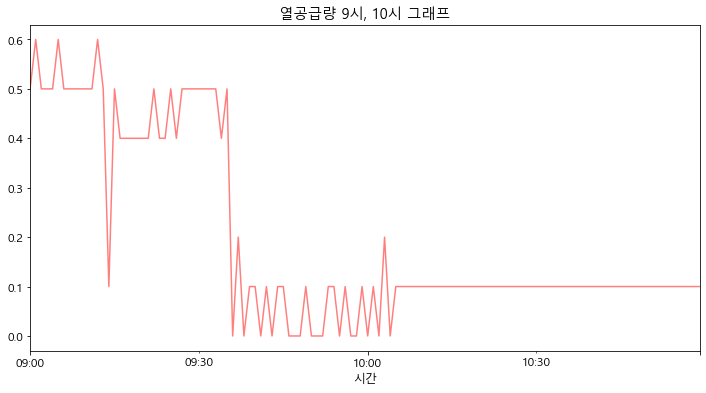

In [146]:
# 2월 17일 데이터만 수집
plot_df = smart_farm_df[smart_farm_df["년월일"] == "2022-02-17"]

# 2월 17일 9시, 10시 데이터만 수집
plot_df = plot_df[(plot_df["시"] == 9) | 
                 (plot_df["시"] == 10)]

plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(12,6))

plot_df["열공급량(kWh)"].plot(ax=ax,color="red",alpha=0.5)

plt.title("열공급량" + " 9시, 10시 그래프")

### 2) x값 확인
- 범주형, 연속형 데이터 타입 확인

hist() 을 통해서 히스토그램 그리기
- 데이터 분포 확인
- 0과 1만 존재하는 범주형 변수 : 배기팬, 유동팬, 팬코일B동
- 나머지 모두 연속형 변수 : 환기온도, 난방온도 ... 등

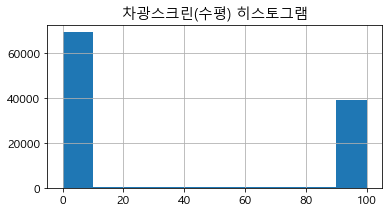

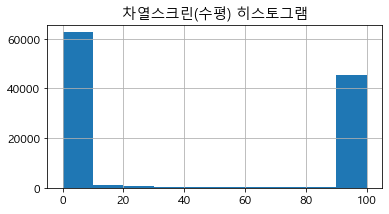

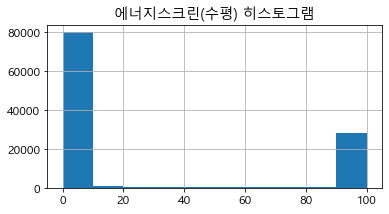

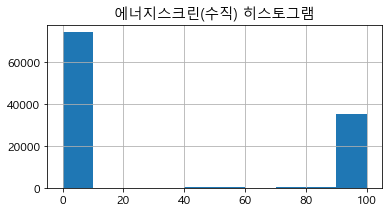

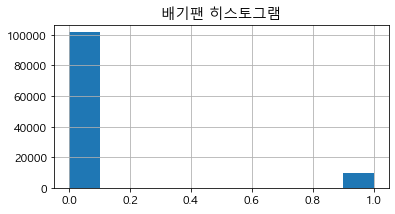

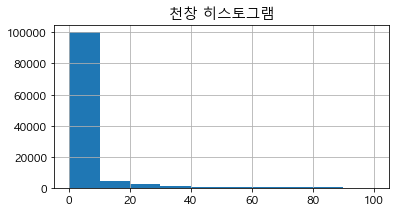

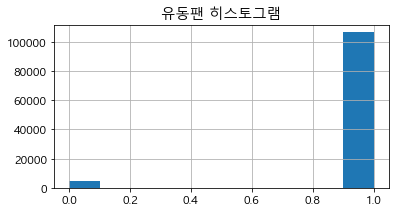

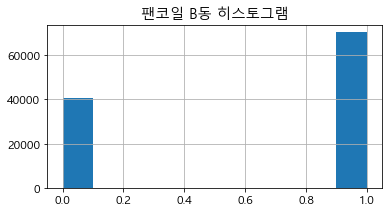

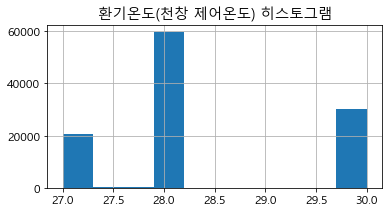

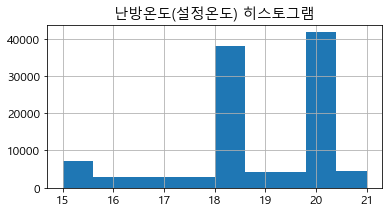

In [109]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    # 그래프 폰트 사이즈 설정
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(6,3))
    smart_farm_df[col].hist()
    plt.title(col+" 히스토그램")

#### 범주형 변수

describe() 를 통해서 데이터 요약
- 최대/최소/중간값 확인
- 사분위수 확인

In [111]:
smart_farm_df["배기팬"].describe()
# 범주형 변수

count    110908.000000
mean          0.084340
std           0.277899
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 배기팬, dtype: float64

value_counts()를 통한 데이터 종류 확인

In [112]:
smart_farm_df["배기팬"].value_counts()

0.0    101554
1.0      9354
Name: 배기팬, dtype: int64

#### 연속형 변수

In [113]:
smart_farm_df["환기온도(천창 제어온도)"].describe()

count    110920.000000
mean         28.356400
std           1.071106
min          27.000000
25%          28.000000
50%          28.000000
75%          30.000000
max          30.000000
Name: 환기온도(천창 제어온도), dtype: float64

In [114]:
smart_farm_df["환기온도(천창 제어온도)"].value_counts()

28.0    59352
30.0    29981
27.0    20663
27.1       56
27.9       55
27.8       53
27.2       53
27.6       52
27.4       51
27.5       50
27.3       47
27.7       45
28.4       29
28.7       28
29.7       27
29.5       26
29.8       26
29.2       26
28.1       25
28.2       25
29.1       25
29.4       24
29.9       24
28.5       23
29.6       23
28.8       23
28.6       22
29.0       22
28.9       22
29.3       22
28.3       20
Name: 환기온도(천창 제어온도), dtype: int64

Violinplot으로 전체 기간에 대한 값 확인
- 연속형 변수에 대한 전체적인 분포 확인
- 연속형 변수의 밀도 확인

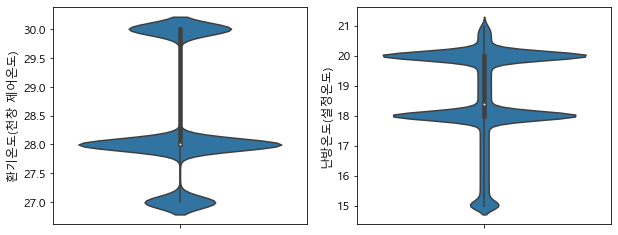

In [115]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.violinplot(y='환기온도(천창 제어온도)', data = smart_farm_df,ax=ax[0]) # y로 데이터 컬럼 지정
sns.violinplot(y='난방온도(설정온도)', data = smart_farm_df,ax=ax[1]) # y로 데이터 컬럼 지정
plt.show()

Boxplot으로 전체 기간에 대한 값 확인
- 어떤 구간에 주로 값들이 분포하는지 확인
- 선을 통해 최대 최소 확인

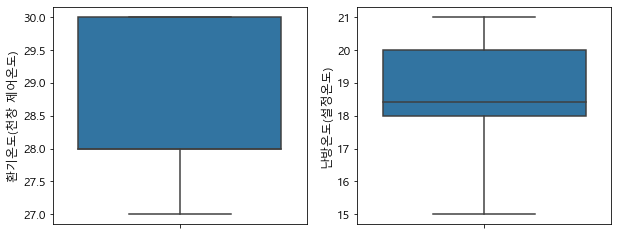

In [117]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(y='환기온도(천창 제어온도)', data = smart_farm_df,ax=ax[0]) # y로 데이터 컬럼 지정
sns.boxplot(y='난방온도(설정온도)', data = smart_farm_df,ax=ax[1]) # y로 데이터 컬럼 지정
plt.show()

#### Violinplot과 Boxplot 분포 확인하기 심화
- 단순히 컬럼 하나의 데이터 분포만 보는 것이 아니라 구분되는 축을 하나 더 추가하는 것
- ex) 월별 환기온도 분포
- 월별로 환기온도 분포 차이가 없다는 결론에 이르름

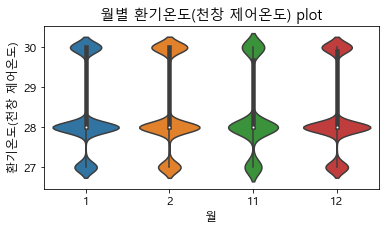

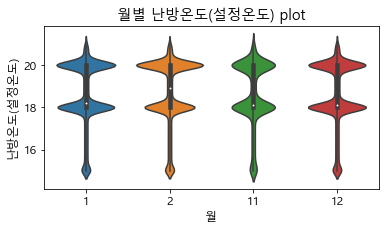

In [119]:
for col in ['환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(6,3))
    sns.violinplot(x="월",y= col, data = smart_farm_df)
    plt.title("월별 "+col+" plot")

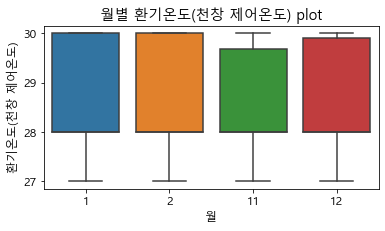

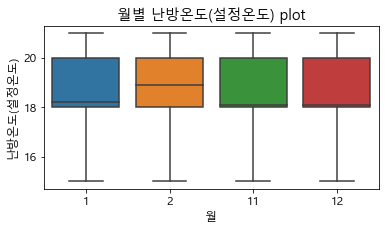

In [120]:
for col in ['환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x="월",y= col, data = smart_farm_df)
    plt.title("월별 "+col+" plot")

### 3) y값 추가 확인
- 월별, 시간대별 열공급량의 분포 재확인

월별로는 큰 차이가 없어보임

Text(0.5, 1.0, '월별 열공급량 분포')

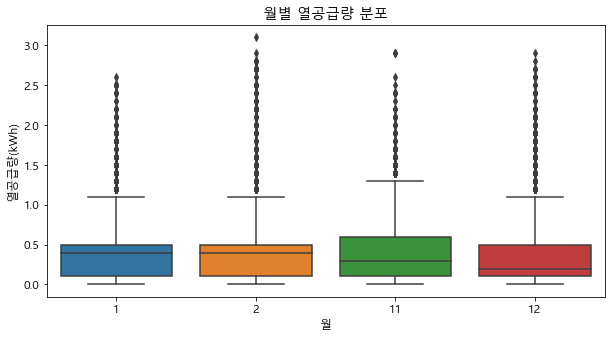

In [123]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="월",y= "열공급량(kWh)", data = smart_farm_df)
plt.title("월별 열공급량 분포")

시간대별로 차이는 명확해보인다
- 주로 낮 시간대에 열공급량이 적어지는 것으로 보임 -> 일사량 관련 변수를 도입해볼까?
- EDA를 통한 데이터 분포 파악 및 모델링 아이디어

Text(0.5, 1.0, '시간대별 열공급량 분포')

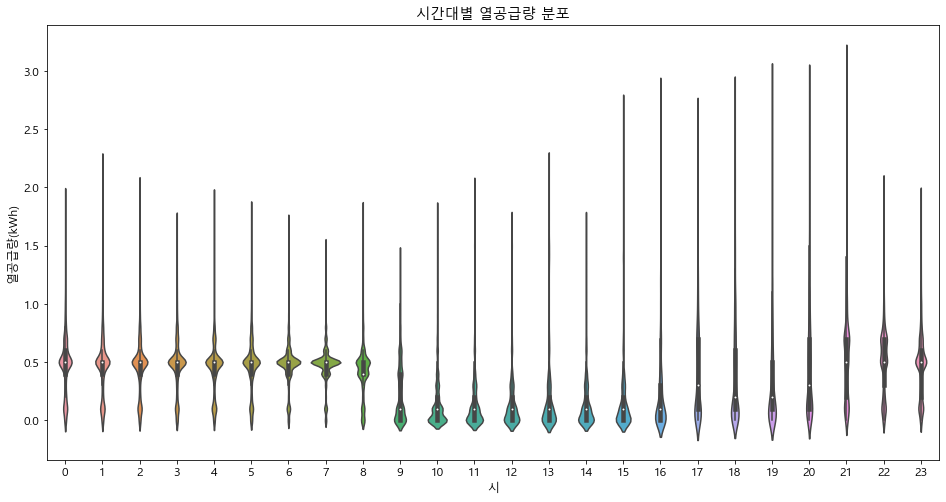

In [129]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(16,8))
sns.violinplot(x="시",y= "열공급량(kWh)", data = smart_farm_df)
plt.title("시간대별 열공급량 분포")